In [1]:
import rasterio
from matplotlib import pyplot as plt
from rasterio.plot import show

import sys
sys.path.insert(0, "..")

from eis_toolkit.prediction.wofe_new_new import weights_of_evidence

In [2]:
with rasterio.open("../tests/data/remote/wofe/wofe_ev_nan.tif") as test_ev:
    with rasterio.open("../tests/data/remote/wofe/wofe_dep_nan_.tif") as test_dep:
        test_wgt_un_, test_gen_un_, test_rst_meta = weights_of_evidence(test_ev, test_dep, 'unique', 2, laplace_smoothing=True)
        test_wgt_asc_, test_gen_asc_, test_rst_meta = weights_of_evidence(test_ev, test_dep, 'ascending', 2, laplace_smoothing=True)
        test_wgt_dsc_, test_gen_dsc_, test_rst_meta = weights_of_evidence(test_ev, test_dep, 'descending', 2, laplace_smoothing=True)

/home/niko/code/plugin_dev/eis_toolkit/notebooks/../eis_toolkit/prediction/wofe_new_new.py:73: RuntimeWarning: invalid value encountered in log
  w_minus = np.log((1 - p_A) / (1 - p_C)) if (1 - p_A) != 0 and (1 - p_C) != 0 else 0
/home/niko/code/plugin_dev/eis_toolkit/notebooks/../eis_toolkit/prediction/wofe_new_new.py:73: RuntimeWarning: invalid value encountered in log
  w_minus = np.log((1 - p_A) / (1 - p_C)) if (1 - p_A) != 0 and (1 - p_C) != 0 else 0


ValueError: Reclassification failed: 'Favorable' class (Class 2) doesn't exist.

In [ ]:
# UNIQUE
test_wgt_un_

,Class,Count,Point Count,WPlus,S_WPlus,WMinus,S_WMinus,Contrast,S_Contrast,Studentized contrast
0,1.0,275,9,0.822,0.339,-0.543,0.380,1.365,0.509,2.682
1,2.0,11,0,-7.400,100.000,0.010,0.252,-7.410,100.001,-0.074
2,3.0,396,5,-0.151,0.450,0.077,0.304,-0.228,0.543,-0.419
3,5.0,43,1,0.471,1.012,-0.025,0.260,0.495,1.045,0.474
4,6.0,1,0,-5.002,100.005,0.001,0.252,-5.003,100.005,-0.050
5,8.0,43,0,-8.763,100.000,0.041,0.252,-8.804,100.000,-0.088
6,10.0,2,1,4.208,1.414,-0.064,0.260,4.272,1.438,2.971
7,13.0,10,0,-7.305,100.000,0.009,0.252,-7.314,100.001,-0.073


In [ ]:
# ASCENDING
test_wgt_asc_

/home/niko/code/plugin_dev/eis_toolkit/notebooks/../eis_toolkit/prediction/wofe_new_new.py:73: RuntimeWarning: invalid value encountered in log
  w_minus = np.log((1 - p_A) / (1 - p_C)) if (1 - p_A) != 0 and (1 - p_C) != 0 else 0


,Class,Count,Point Count,WPlus,S_WPlus,WMinus,S_WMinus,Contrast,S_Contrast,Studentized contrast,Generalized class,Generalized WPlus,Generalized S_WPlus
0,1.0,275,9,0.822,0.339,-0.543,0.380,1.365,0.509,2.682,2,0.8017,0.2396
1,2.0,286,9,0.782,0.339,-0.529,0.380,1.311,0.509,2.576,2,0.8017,0.2396
2,3.0,682,14,0.343,0.270,-1.110,0.709,1.453,0.759,1.915,1,0.3384,0.1059
3,5.0,725,15,0.351,0.261,-1.694,1.001,2.045,1.035,1.977,1,0.3384,0.1059
4,6.0,726,15,0.350,0.261,-1.691,1.001,2.041,1.035,1.973,1,0.3384,0.1059
5,8.0,769,15,0.291,0.261,-1.566,1.002,1.857,1.035,1.795,1,0.3384,0.1059
6,10.0,771,16,0.354,0.253,NaN,0.056,NaN,0.259,NaN,1,0.3384,0.1059
7,13.0,781,16,0.341,0.253,NaN,0.057,NaN,0.259,NaN,1,0.3384,0.1059


In [ ]:
# DESCENDING
test_wgt_dsc_

/home/niko/code/plugin_dev/eis_toolkit/notebooks/../eis_toolkit/prediction/wofe_new_new.py:73: RuntimeWarning: invalid value encountered in log
  w_minus = np.log((1 - p_A) / (1 - p_C)) if (1 - p_A) != 0 and (1 - p_C) != 0 else 0


ValueError: Reclassification failed: 'Favorable' class (Class 2) doesn't exist.

<Axes: title={'center': 'Generalized weights'}>

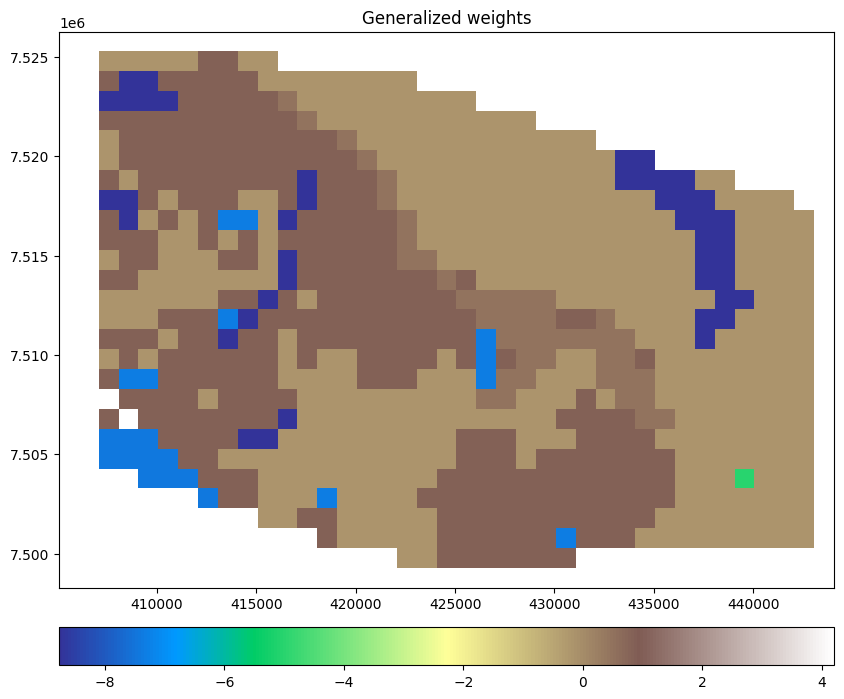

In [3]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_un_["WPlus"], cmap='terrain')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_un_["WPlus"], ax = ax, transform = test_ev.transform, cmap='terrain')

<Axes: title={'center': 'Generalized weights'}>

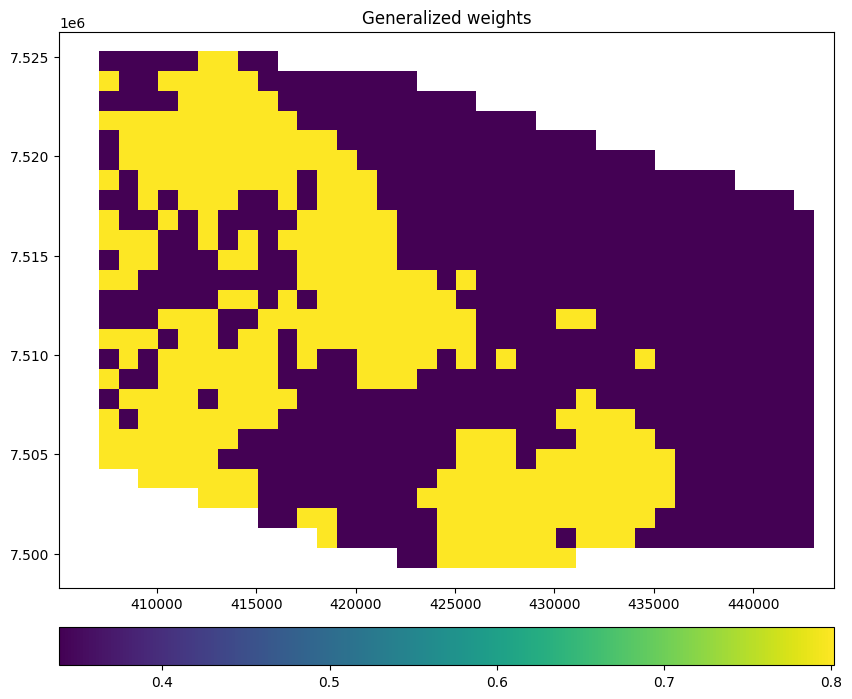

In [4]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_asc_["Generalized WPlus"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_asc_["Generalized WPlus"], ax = ax, transform = test_ev.transform, cmap='viridis')

<Axes: title={'center': 'Generalized weights'}>

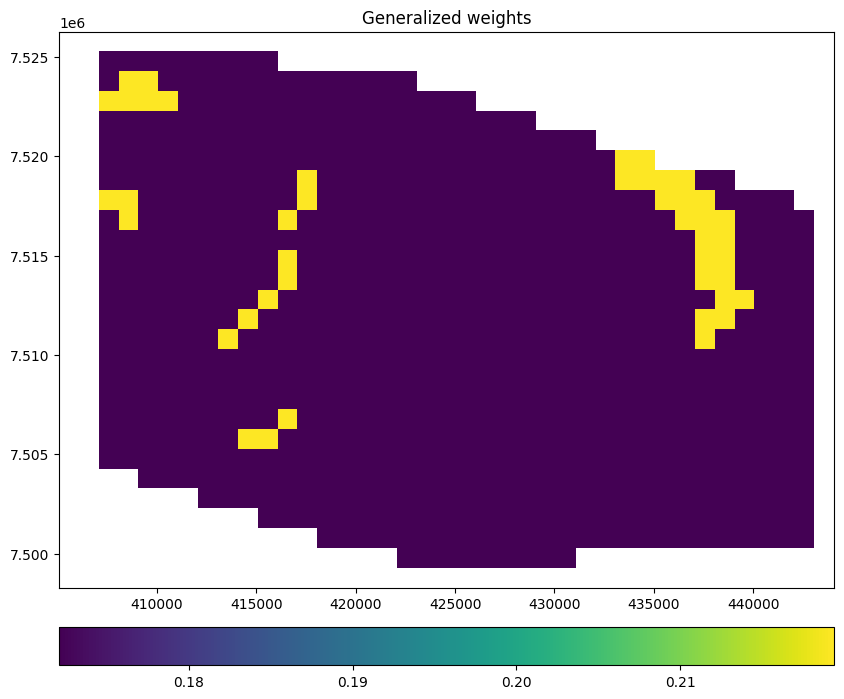

In [ ]:
fig, ax = plt.subplots(figsize = (10,10))
ax.set_title("Generalized weights")
clrbar = ax.imshow(test_gen_dsc_["Generalized WPlus"], cmap='viridis')
plt.colorbar(clrbar, orientation="horizontal", pad = 0.05)
show(test_gen_dsc_["Generalized WPlus"], ax = ax, transform = test_ev.transform, cmap='viridis')